# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | yamada
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ancud
Processing Record 8 of Set 1 | nova sintra
Processing Record 9 of Set 1 | fukuecho
Processing Record 10 of Set 1 | san juan del sur
Processing Record 11 of Set 1 | susuman
Processing Record 12 of Set 1 | magdalena de kino
Processing Record 13 of Set 1 | algona
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | ardesen
Processing Record 17 of Set 1 | brookings
Processing Record 18 of Set 1 | kapuskasing
Processing Record 19 of Set 1 | northam
Processing Record 20 of Set 1 | inirida
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | port-aux-francais
P

In [8]:

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,67.12,63,71,7.70,JP,1683829765
1,adamstown,-25.0660,-130.1015,70.66,55,94,19.75,PN,1683829765
2,margaret river,-33.9500,115.0667,51.69,75,13,7.99,AU,1683829765
3,saipan,15.1355,145.7010,81.30,100,40,5.01,MP,1683829765
4,yamada,39.4667,141.9500,42.48,86,5,4.07,JP,1683829766


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

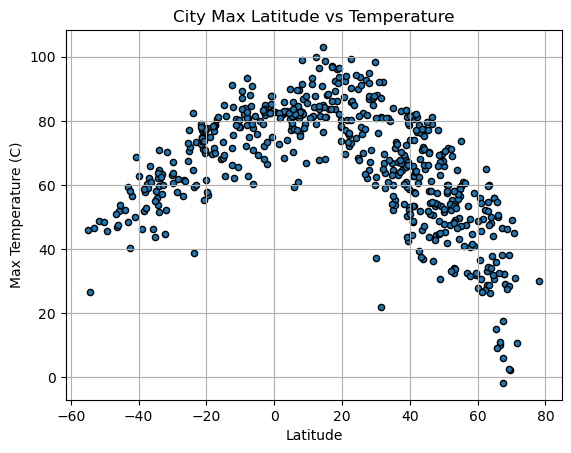

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', 
                          y='Max Temp',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

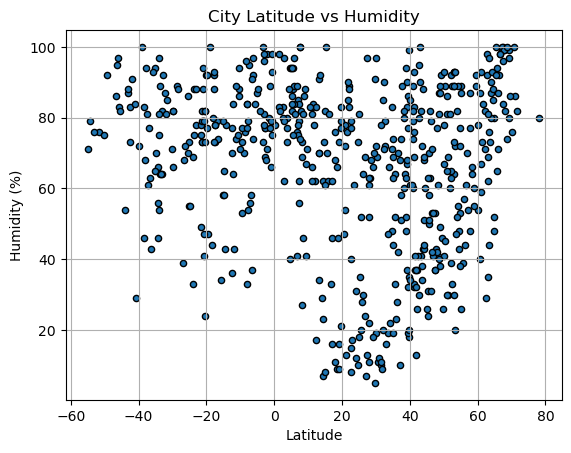

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', 
                          y='Humidity',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

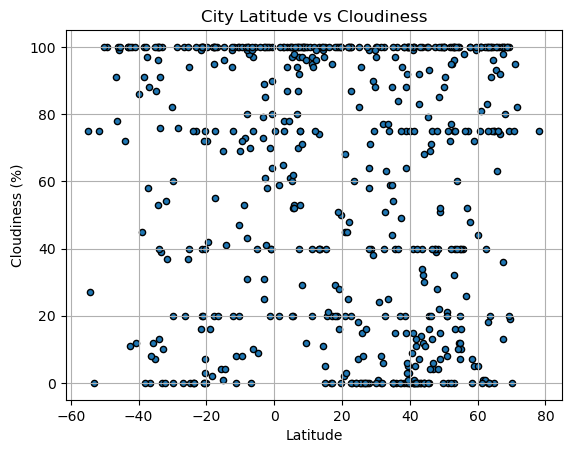

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', 
                          y='Cloudiness',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

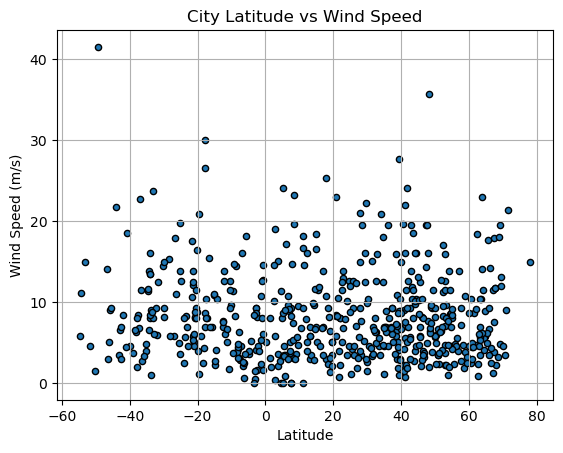

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', 
                          y='Wind Speed',
                          marker='o',
                          edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, x_label, y_label, text_location):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,text_location,fontsize=15,color="red")
    
    print(f"The r-value is: {rvalue**2}")


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,67.12,63,71,7.70,JP,1683829765
3,saipan,15.1355,145.7010,81.30,100,40,5.01,MP,1683829765
4,yamada,39.4667,141.9500,42.48,86,5,4.07,JP,1683829766
7,nova sintra,14.8667,-24.7167,68.11,82,5,16.60,CV,1683829766
8,fukuecho,32.6881,128.8419,63.82,72,51,6.31,JP,1683829766


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,adamstown,-25.0660,-130.1015,70.66,55,94,19.75,PN,1683829765
2,margaret river,-33.9500,115.0667,51.69,75,13,7.99,AU,1683829765
5,waitangi,-43.9535,-176.5597,52.23,54,72,21.81,NZ,1683829766
6,ancud,-41.8697,-73.8203,56.53,91,100,8.39,CL,1683829766
13,edinburgh of the seven seas,-37.0676,-12.3116,62.15,77,88,22.77,SH,1683829768


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6070251795323506


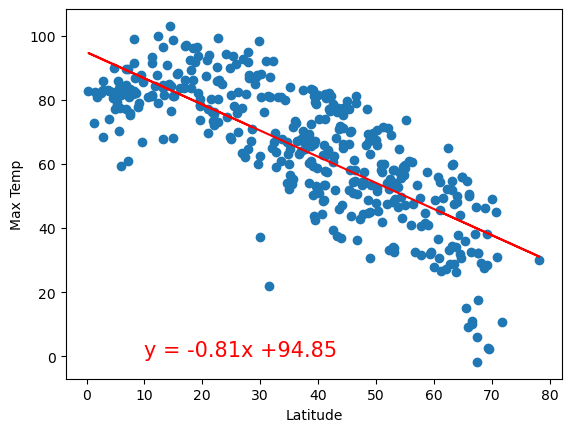

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
text_location = (10,0)
linear_reg_plot(x_values, y_values, 'Latitude', 'Max Temp', text_location)

The r-value is: 0.6586273925708548


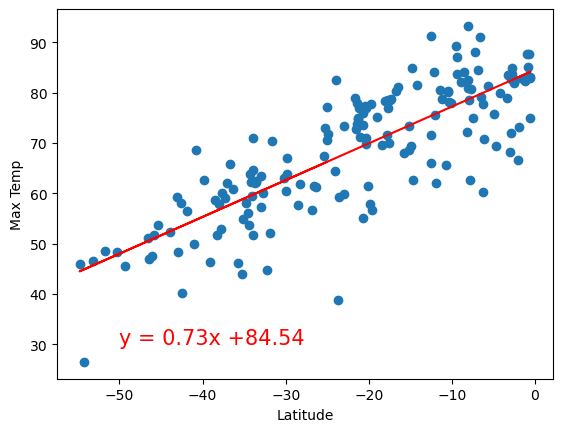

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
text_location = (-50,30)
linear_reg_plot(x_values, y_values, 'Latitude', 'Max Temp', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008714825570934387


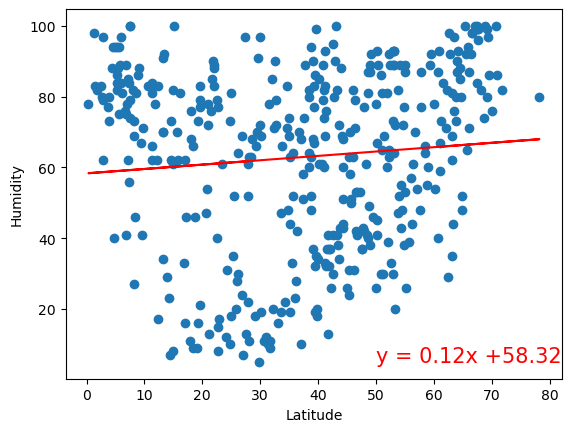

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
text_location = (50, 5)
linear_reg_plot(x_values, y_values, 'Latitude', 'Humidity', text_location)

The r-value is: 0.0008602980053018939


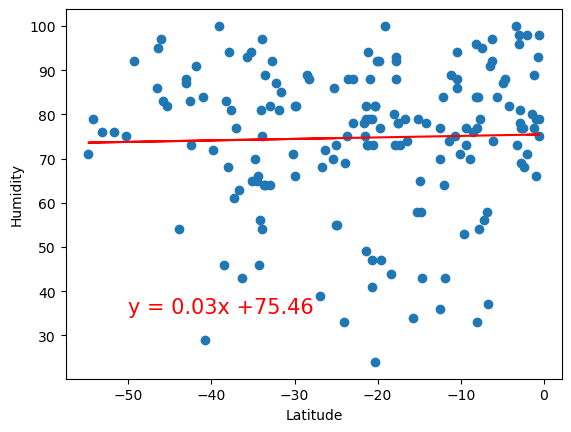

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
text_location = (-50, 35)
linear_reg_plot(x_values, y_values, 'Latitude', 'Humidity', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004640117018948809


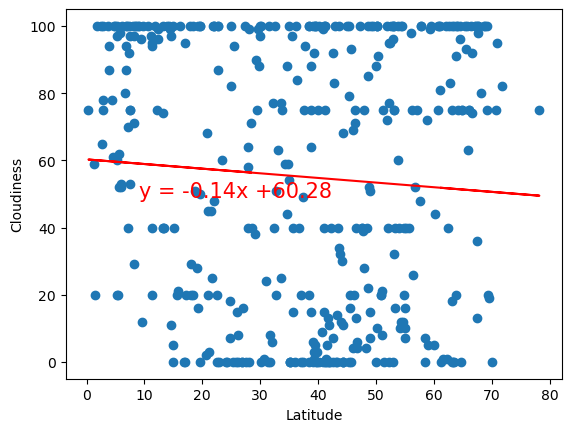

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
text_location = (9, 49)
linear_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness', text_location)

The r-value is: 4.344400463985441e-05


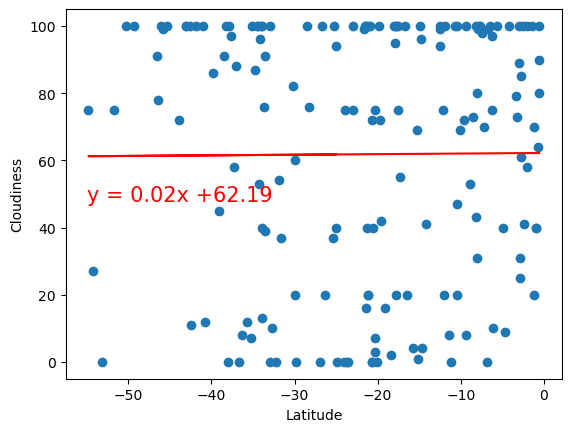

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
text_location = (-55, 48)
linear_reg_plot(x_values, y_values, 'Latitude', 'Cloudiness', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0005752367116523016


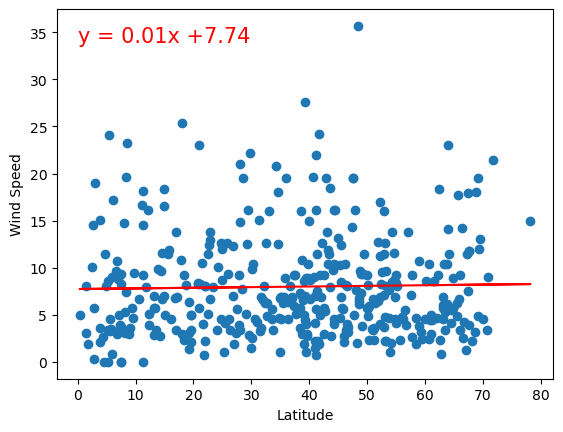

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
text_location = (0, 34)
linear_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed', text_location)

The r-value is: 0.03657281192890003


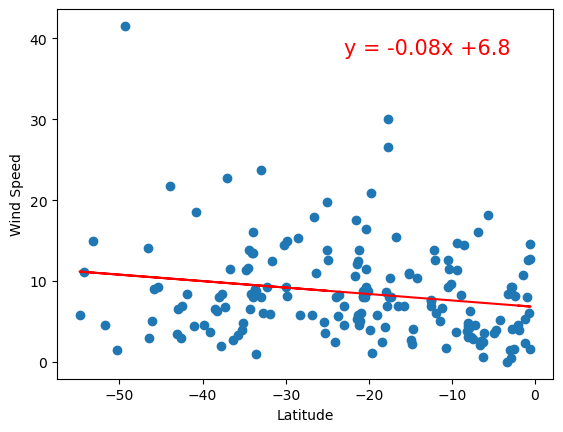

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
text_location = (-23, 38)
linear_reg_plot(x_values, y_values, 'Latitude', 'Wind Speed', text_location)

**Discussion about the linear relationship:** YOUR RESPONSE HERE